# Project Idea:

→ There is a new law in chicago that has been passed in early 2013.

→ Can we attribute a fall in violent crime in Chicago to its new conceal and carry laws?

→ In our home town there is a notion that crimes are high during summers due to unemployment. I made analysis on does weather can impact the crime rate in chicago as well.

→ I found interesting results between crime rate and temperature.

# Goals of Project:
→ Distribution of personal and property crimes with temperature.

→ Correlation between various types of crimes and temperature.

→  Relationship crime has with environmental factors like temperature as well as temporal factors like the hour of the day and day of the week.

→ Statistical modeling for personal and property crimes.

→ Find evidence of substantial differences in reporting crime data since 2013.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats

In [2]:
weather_df = pd.read_csv('/Users/anusha/Desktop/weather.csv',low_memory=False,index_col=0)
weather_df.index = pd.to_datetime(weather_df.index)
weather_df['PrecipitationIn'] = weather_df['PrecipitationIn'].replace('T',np.nan)
weather_df['PrecipitationIn'] = weather_df['PrecipitationIn'].dropna().astype(float)
weather_df.tail()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees<br />
2014-04-02,45.0,40.0,34.0,29.0,26.0,24.0,70.0,60.0,49.0,30.17,...,10.0,10.0,10.0,17.0,10.0,29.0,NaN,7.0,Rain,35<br />
2014-04-03,43.0,39.0,35.0,36.0,32.0,28.0,89.0,75.0,60.0,30.04,...,10.0,6.0,0.0,29.0,14.0,35.0,0.53,8.0,Rain-Thunderstorm,68<br />
2014-04-04,48.0,41.0,34.0,41.0,33.0,21.0,92.0,73.0,54.0,30.00,...,10.0,6.0,0.0,30.0,17.0,40.0,NaN,8.0,Fog,248<br />
2014-04-05,51.0,41.0,31.0,25.0,22.0,17.0,69.0,49.0,29.0,30.20,...,10.0,10.0,10.0,13.0,6.0,16.0,0.00,3.0,NaN,243<br />
2014-04-06,57.0,44.0,31.0,29.0,25.0,19.0,63.0,49.0,35.0,30.17,...,10.0,10.0,10.0,14.0,7.0,20.0,0.00,4.0,NaN,176<br />


In [3]:
weather_df.columns

Index(['Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees<br />'],
      dtype='object')

In [7]:
allcrime_df = pd.read_csv('/Users/anusha/Desktop/Crimes_-_2001_to_present.csv',low_memory=False, index_col=False)
allcrime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
allcrime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [9]:
allcrime_df['Datetime'] = pd.to_datetime(allcrime_df['Date'],format="%m/%d/%Y %I:%M:%S %p")
allcrime_df['Date'] = allcrime_df['Datetime'].apply(lambda x:x.date())
allcrime_df['Weekday'] = allcrime_df['Datetime'].apply(lambda x:x.weekday())
allcrime_df['Hour'] = allcrime_df['Datetime'].apply(lambda x:x.hour)
allcrime_df['Day'] = allcrime_df['Datetime'].apply(lambda x:x.day)
allcrime_df['Week'] = allcrime_df['Datetime'].apply(lambda x:x.week)
allcrime_df['Month'] = allcrime_df['Datetime'].apply(lambda x:x.month)

allcrime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,Datetime,Weekday,Hour,Day,Week,Month
0,10000092,HY189866,2015-03-18,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)",2015-03-18 19:44:00,2,19,18,12,3
1,10000094,HY190059,2015-03-18,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)",2015-03-18 23:00:00,2,23,18,12,3
2,10000095,HY190052,2015-03-18,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)",2015-03-18 22:45:00,2,22,18,12,3
3,10000096,HY190054,2015-03-18,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)",2015-03-18 22:30:00,2,22,18,12,3
4,10000097,HY189976,2015-03-18,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)",2015-03-18 21:00:00,2,21,18,12,3


In [10]:
dict(Counter(allcrime_df['Primary Type']))

{'BATTERY': 1230984,
 'OTHER OFFENSE': 418044,
 'ROBBERY': 255353,
 'NARCOTICS': 710413,
 'CRIMINAL DAMAGE': 770811,
 'WEAPONS VIOLATION': 70535,
 'THEFT': 1416257,
 'BURGLARY': 387662,
 'MOTOR VEHICLE THEFT': 313942,
 'PUBLIC PEACE VIOLATION': 47734,
 'DECEPTIVE PRACTICE': 261884,
 'ASSAULT': 417925,
 'CRIMINAL TRESPASS': 193190,
 'CRIM SEXUAL ASSAULT': 27028,
 'INTERFERENCE WITH PUBLIC OFFICER': 15112,
 'ARSON': 11144,
 'LIQUOR LAW VIOLATION': 14053,
 'KIDNAPPING': 6655,
 'SEX OFFENSE': 25052,
 'OFFENSE INVOLVING CHILDREN': 45254,
 'PROSTITUTION': 68290,
 'HOMICIDE': 9410,
 'GAMBLING': 14420,
 'INTIMIDATION': 3927,
 'STALKING': 3363,
 'OBSCENITY': 578,
 'PUBLIC INDECENCY': 161,
 'HUMAN TRAFFICKING': 49,
 'CONCEALED CARRY LICENSE VIOLATION': 282,
 'OTHER NARCOTIC VIOLATION': 123,
 'NON - CRIMINAL': 38,
 'NON-CRIMINAL': 163,
 'RITUALISM': 23,
 'NON-CRIMINAL (SUBJECT SPECIFIED)': 9,
 'DOMESTIC VIOLENCE': 1}

In [11]:
personal_crimes = ['ASSAULT','BATTERY','CRIM SEXUAL ASSAULT','HOMICIDE']
property_crimes = ['ARSON','BURGLARY','MOTOR VEHICLE THEFT','ROBBERY','THEFT']

In [322]:
arson_gb = allcrime_df[allcrime_df['Primary Type'] == 'ARSON'].groupby('Date')['ID'].agg(len)
assault_gb = allcrime_df[allcrime_df['Primary Type'] == 'ASSAULT'].groupby('Date')['ID'].agg(len)
battery_gb = allcrime_df[allcrime_df['Primary Type'] == 'BATTERY'].groupby('Date')['ID'].agg(len)
burglary_gb = allcrime_df[allcrime_df['Primary Type'] == 'BURGLARY'].groupby('Date')['ID'].agg(len)
homicide_gb = allcrime_df[allcrime_df['Primary Type'] == 'HOMICIDE'].groupby('Date')['ID'].agg(len)
sexual_assault_gb = allcrime_df[allcrime_df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].groupby('Date')['ID'].agg(len)
robbery_gb = allcrime_df[allcrime_df['Primary Type'] == 'ROBBERY'].groupby('Date')['ID'].agg(len)
theft_gb = allcrime_df[allcrime_df['Primary Type'] == 'THEFT'].groupby('Date')['ID'].agg(len)
vehicle_theft_gb = allcrime_df[allcrime_df['Primary Type'] == 'MOTOR VEHICLE THEFT'].groupby('Date')['ID'].agg(len)
personal_gb = allcrime_df[allcrime_df['Primary Type'].isin(personal_crimes)].groupby('Date')['ID'].agg(len)
property_gb = allcrime_df[allcrime_df['Primary Type'].isin(property_crimes)].groupby('Date')['ID'].agg(len)

arson_gb.index = pd.to_datetime(arson_gb.index)
assault_gb.index = pd.to_datetime(assault_gb.index)
battery_gb.index = pd.to_datetime(battery_gb.index)
burglary_gb.index = pd.to_datetime(burglary_gb.index)
homicide_gb.index = pd.to_datetime(homicide_gb.index)
sexual_assault_gb.index = pd.to_datetime(sexual_assault_gb.index)
robbery_gb.index = pd.to_datetime(robbery_gb.index)
theft_gb.index = pd.to_datetime(theft_gb.index)
vehicle_theft_gb.index = pd.to_datetime(vehicle_theft_gb.index)
personal_gb.index = pd.to_datetime(personal_gb.index)
property_gb.index = pd.to_datetime(property_gb.index)


ts = pd.DataFrame({'Arson':arson_gb.loc[:'2014-3-31'],
                   'Assault':assault_gb.loc[:'2014-3-31'],
                   'Battery':battery_gb.loc[:'2014-3-31'],
                   'Burglary':burglary_gb.loc[:'2014-3-31'],
                   'Homicide':homicide_gb.loc[:'2014-3-31'],
                   'Sexual_assault':sexual_assault_gb.loc[:'2014-3-31'],
                   'Robbery':robbery_gb.loc[:'2014-3-31'],
                   'Vehicle_theft':vehicle_theft_gb.loc[:'2014-3-31'],
                   'Theft':theft_gb.loc[:'2014-3-31'],
                   'Personal':personal_gb.loc[:'2014-3-31'],
                   'Property':property_gb.loc[:'2014-3-31'],
                   'Temperature':weather_df['Mean TemperatureF'].loc[:'2014-3-31'],
                   'Binned temperature':weather_df['Mean TemperatureF'].loc[:'2014-3-31']//10.*10,
                   'Humidity':weather_df[' Mean Humidity'].loc[:'2014-3-31'],
                   'Precipitation':weather_df['PrecipitationIn'].loc[:'2014-3-31']
                   })
ts

,Arson,Assault,Battery,Burglary,Homicide,Sexual_assault,Robbery,Vehicle_theft,Theft,Personal,Property,Temperature,Binned temperature,Humidity,Precipitation
Date,,,,,,,,,,,,,,,
2001-01-01,NaN,70,296,66,2.0,38.0,41,60,413,406,580,14.0,10.0,81.0,0.00
2001-01-02,NaN,66,143,68,NaN,2.0,35,65,221,211,389,12.0,10.0,83.0,0.00
2001-01-03,1.0,79,165,57,NaN,7.0,51,72,226,251,407,18.0,10.0,88.0,0.00
2001-01-04,1.0,57,173,55,2.0,2.0,55,87,243,234,441,24.0,20.0,88.0,0.00
2001-01-05,3.0,68,178,55,1.0,6.0,55,86,265,253,464,30.0,30.0,73.0,0.02
2001-01-06,4.0,67,236,64,4.0,4.0,54,76,246,311,444,26.0,20.0,77.0,0.00
2001-01-07,NaN,61,218,51,1.0,7.0,36,58,205,287,350,28.0,20.0,78.0,0.00
2001-01-08,3.0,67,192,53,NaN,3.0,44,62,244,262,406,20.0,20.0,74.0,0.00
2001-01-09,3.0,63,212,75,2.0,3.0,38,65,261,280,442,16.0,10.0,78.0,0.00


In [332]:
ts['Time'] = range((max(ts.index)-min(ts.index)).days+1)

#ts.reset_index(inplace=True)
ts.set_index('Date',drop=False,inplace=True)
ts['Weekday'] = ts['Date'].apply(lambda x:x.weekday())
ts['Hour'] = ts['Date'].apply(lambda x:x.hour)
ts['Week'] = ts['Date'].apply(lambda x:x.week)
ts['Month'] = ts['Date'].apply(lambda x:x.month)
ts['Year'] = ts['Date'].apply(lambda x:x.year)
ts['Weekend'] = ts['Weekday'].isin([5,6]).astype(int)

In [333]:
ts

,Date,Arson,Assault,Battery,Burglary,Homicide,Sexual_assault,Robbery,Vehicle_theft,Theft,...,Binned temperature,Humidity,Precipitation,Time,Weekday,Hour,Week,Month,Year,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001-01-01,NaN,70,296,66,2.0,38.0,41,60,413,...,10.0,81.0,0.00,0,0,0,1,1,2001,0
2001-01-02,2001-01-02,NaN,66,143,68,NaN,2.0,35,65,221,...,10.0,83.0,0.00,1,1,0,1,1,2001,0
2001-01-03,2001-01-03,1.0,79,165,57,NaN,7.0,51,72,226,...,10.0,88.0,0.00,2,2,0,1,1,2001,0
2001-01-04,2001-01-04,1.0,57,173,55,2.0,2.0,55,87,243,...,20.0,88.0,0.00,3,3,0,1,1,2001,0
2001-01-05,2001-01-05,3.0,68,178,55,1.0,6.0,55,86,265,...,30.0,73.0,0.02,4,4,0,1,1,2001,0
2001-01-06,2001-01-06,4.0,67,236,64,4.0,4.0,54,76,246,...,20.0,77.0,0.00,5,5,0,1,1,2001,1
2001-01-07,2001-01-07,NaN,61,218,51,1.0,7.0,36,58,205,...,20.0,78.0,0.00,6,6,0,1,1,2001,1
2001-01-08,2001-01-08,3.0,67,192,53,NaN,3.0,44,62,244,...,20.0,74.0,0.00,7,0,0,2,1,2001,0
2001-01-09,2001-01-09,3.0,63,212,75,2.0,3.0,38,65,261,...,10.0,78.0,0.00,8,1,0,2,1,2001,0


# Correlation between various types of crimes and temperature:

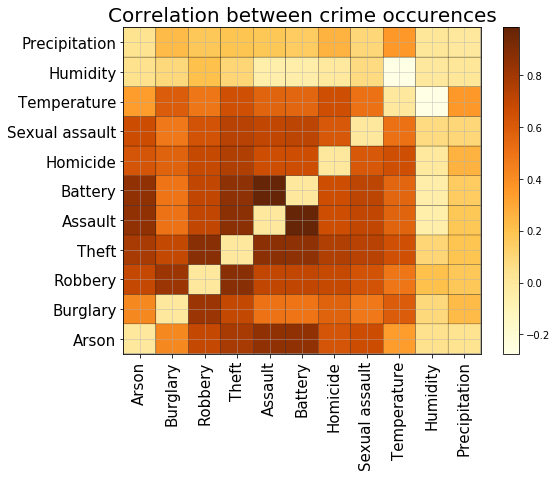

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#ts.corr().columns
a = np.array(ts[['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual_assault','Temperature','Humidity','Precipitation']].resample('M').sum().corr())
np.fill_diagonal(a,0)
plt.pcolor(a,cmap='YlOrBr',edgecolors='k')

plt.xlim((0,11))
plt.ylim((0,11))

plt.xticks(np.arange(.5,11.5),['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual assault','Temperature','Humidity','Precipitation'],rotation=90,fontsize=15)
plt.yticks(np.arange(.5,11.5),['Arson','Burglary','Robbery','Theft','Assault','Battery','Homicide','Sexual assault','Temperature','Humidity','Precipitation'],fontsize=15)

plt.title('Correlation between crime occurences',fontsize=20)
plt.colorbar()
plt.grid(b=True,which='major',alpha=.5)

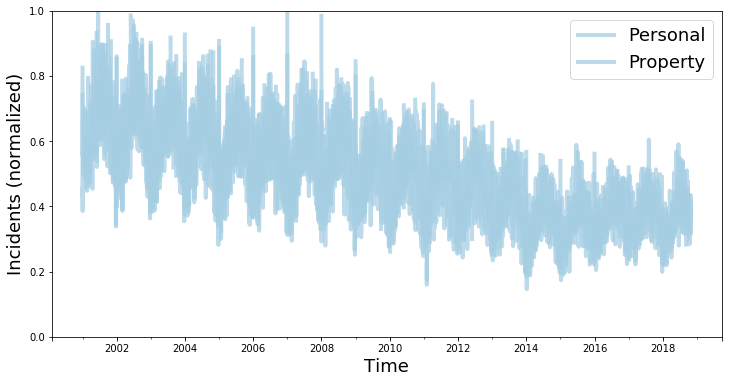

In [119]:
plt.figure(figsize=(12,6))

ts3 = pd.DataFrame({'Personal':personal_gb/float(personal_gb.max()),
                    'Property':property_gb/float(property_gb.max())
                    })
monthly = ts3.resample('M')
#ax = monthly.plot(lw=4,alpha=.75,color = {'Personal':'#BB0000', 'Property':'#0000BB'})
ax = monthly.plot(lw=4,alpha=.75,colormap='Paired')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Incidents (normalized)',fontsize=18)
plt.ylim((0,1))
plt.grid(False,which='minor')
plt.legend(["Personal", "Property"], loc='upper right', fontsize=18);
#ax.legend(loc='upper center',ncol=4,fontsize=18)

# Distribution of personal and property crimes data with temperature:

Text(0.5,0.98,'Crime vs Temperature')

<Figure size 576x432 with 0 Axes>

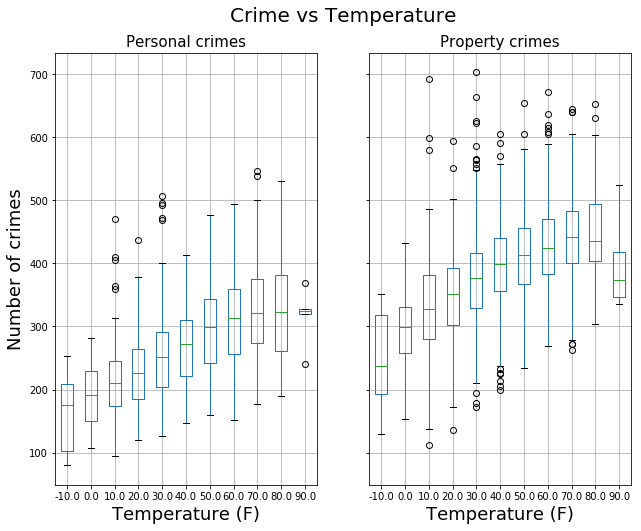

In [97]:
plt.figure(figsize=(8,6))
ax = ts.boxplot(['Personal','Property'],by='Binned temperature', figsize=(10,8))
ax[0].set_ylabel('Number of crimes',fontsize=18)
ax[0].set_xlabel('Temperature (F)',fontsize=18)
ax[0].set_title('Personal crimes',fontsize=15)

ax[1].set_xlabel('Temperature (F)',fontsize=18)
ax[1].set_title('Property crimes',fontsize=15)

plt.suptitle('Crime vs Temperature',fontsize=20)

# Relationship crime has with temperature as well as temporal factors:

In [121]:
crime_df_gb_personal = allcrime_df[allcrime_df['Primary Type'].isin(personal_crimes)]
crime_df_gb_property = allcrime_df[allcrime_df['Primary Type'].isin(property_crimes)]

In [140]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

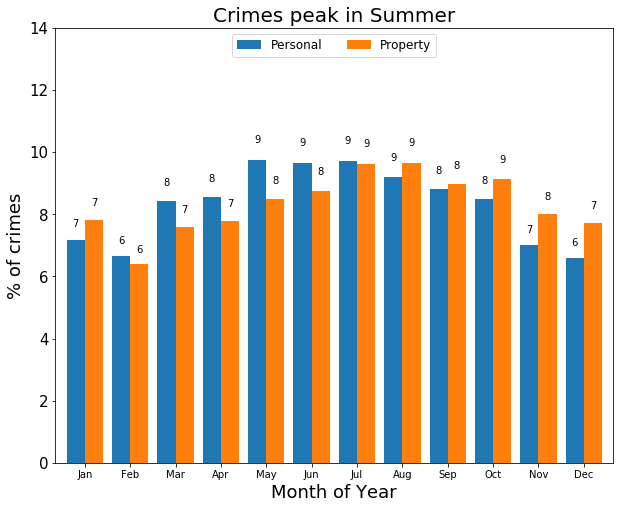

In [164]:
bar_df = pd.DataFrame()
bar_df['Personal'] = crime_df_gb_personal.groupby('Month')['ID'].agg(len)/len(crime_df_gb_personal)*100
bar_df['Property'] = crime_df_gb_property.groupby('Month')['ID'].agg(len)/len(crime_df_gb_property)*100
ax = bar_df.plot(kind='bar',align='center', width=0.8, figsize=(10,8))
plt.title('Crimes peak in Summer',fontsize=20)
plt.xlabel('Month of Year', fontsize=18)
plt.xticks(plt.xticks()[0],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],fontsize=10,rotation=0)
plt.ylabel('% of crimes', fontsize=18)
plt.yticks(fontsize=15)
plt.ylim((0,14))
plt.legend(fontsize=12,ncol=2,loc='upper center')
autolabel(ax.patches)

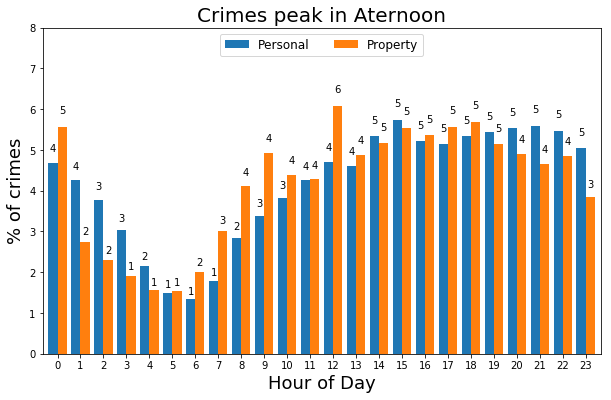

In [162]:
bar_df = pd.DataFrame()
bar_df['Personal'] = crime_df_gb_personal.groupby('Hour')['ID'].agg(len)/len(crime_df_gb_personal)*100
bar_df['Property'] = crime_df_gb_property.groupby('Hour')['ID'].agg(len)/len(crime_df_gb_property)*100
ax = bar_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
plt.title('Crimes peak in Aternoon',fontsize=20)
plt.xlabel('Hour of Day', fontsize=18)
plt.xticks(fontsize=10,rotation=0)
plt.ylabel('% of crimes', fontsize=18)
plt.yticks(fontsize=10)
plt.ylim((0,8))
plt.legend(fontsize=12,ncol=2,loc='upper center')
autolabel(ax.patches)

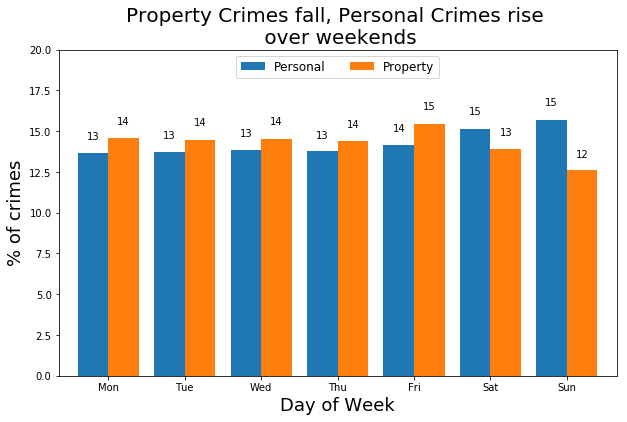

In [167]:
bar_df = pd.DataFrame()
bar_df['Personal'] = crime_df_gb_personal.groupby('Weekday')['ID'].agg(len)/len(crime_df_gb_personal)*100
bar_df['Property'] = crime_df_gb_property.groupby('Weekday')['ID'].agg(len)/len(crime_df_gb_property)*100
ax = bar_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
plt.title('Property Crimes fall, Personal Crimes rise \n over weekends',fontsize=20)
plt.xlabel('Day of Week', fontsize=18)
plt.xticks(plt.xticks()[0],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=10,rotation=0)
plt.ylabel('% of crimes', fontsize=18)
plt.yticks(fontsize=10)
plt.ylim((0,20))
plt.legend(fontsize=12,ncol=2,loc='upper center')
autolabel(ax.patches)

# Find evidence of substantial differences in reporting crime data since 2013:

Property Crimes:

Text(0.5,1,'Property crime rates across districts fall faster\nin 2013 than previous 3 years combined')

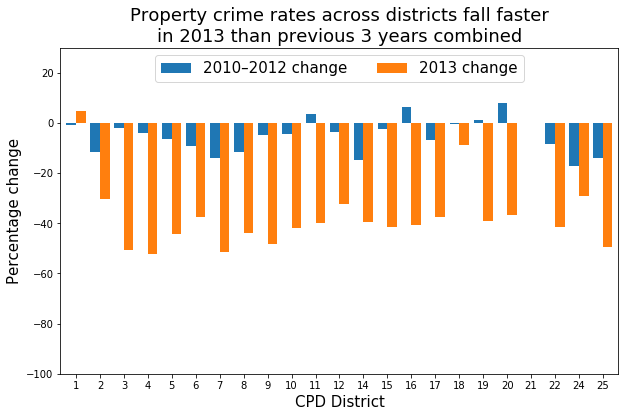

In [298]:
property_gb_district_df = pd.DataFrame()

for year in range(2003,2019):
    property_gb_district_df[year] = crime_df_gb_property[crime_df_gb_property['Year'] == year].groupby('District')['ID'].agg(len).loc[:25]

district_property_change_df = pd.DataFrame()
district_property_change_df[u'2010\N{EN DASH}2012 change'] = (property_gb_district_df[2012]-property_gb_district_df[2010])/property_gb_district_df[2010]*100
district_property_change_df['2013 change'] = (property_gb_district_df[2018]-property_gb_district_df[2012])/property_gb_district_df[2012]*100
districts = [int(i) for i in list(property_gb_district_df.T.columns)]
ax = district_property_change_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
ax.set_xticklabels(districts,rotation=0)
ax.legend(ncol=3,fontsize=15,loc='upper center')
ax.set_ylim((-100,30))

ax.set_ylabel("Percentage change",fontsize=15)
ax.set_xlabel("CPD District",fontsize=15)
ax.set_title("Property crime rates across districts fall faster\nin 2013 than previous 3 years combined",fontsize=18)

Personal Crimes:

Text(0.5,1,'Personal crime rates across districts fall faster\nin 2013 than previous 3 years combined')

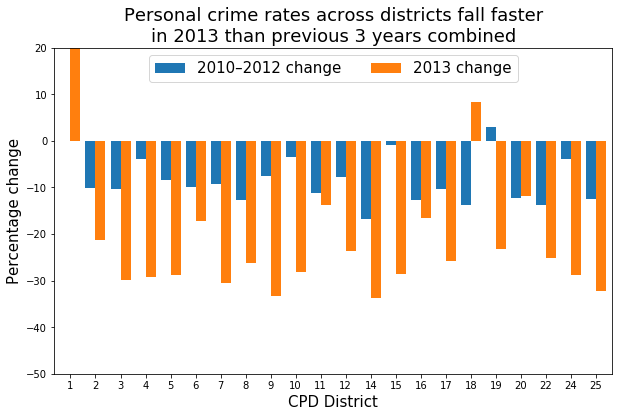

In [299]:
personal_gb_district_df = pd.DataFrame()

for year in range(2001,2019):
    personal_gb_district_df[year] = crime_df_gb_personal[crime_df_gb_personal['Year'] == year].groupby('District')['ID'].agg(len).loc[:25]

district_personal_change_df = pd.DataFrame()
district_personal_change_df[u'2010\N{EN DASH}2012 change'] = (personal_gb_district_df[2012]-personal_gb_district_df[2010])/personal_gb_district_df[2010]*100
district_personal_change_df['2013 change'] = (personal_gb_district_df[2018]-personal_gb_district_df[2012])/personal_gb_district_df[2012]*100
districts = [int(i) for i in list(district_personal_change_df.T.columns)]
ax = district_personal_change_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
ax.set_xticklabels(districts,rotation=0)
ax.legend(ncol=3,fontsize=15,loc='upper center')
ax.set_ylim((-50,20))

ax.set_ylabel("Percentage change",fontsize=15)
ax.set_xlabel("CPD District",fontsize=15)
ax.set_title("Personal crime rates across districts fall faster\nin 2013 than previous 3 years combined",fontsize=18)

# What about Homicide crime rate since 2013? 

Text(0.5,1,'Homicide rates across districts fall\nin 2013 despite significant increases in recent years')

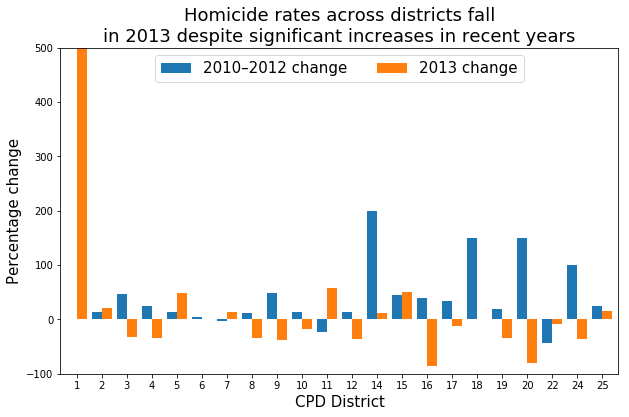

In [367]:
homicide_df = allcrime_df[allcrime_df['Primary Type'] == "HOMICIDE"]

homicide_gb_district_df = pd.DataFrame()

for year in range(2003,2019):
    homicide_gb_district_df[year] = homicide_df[homicide_df['Year'] == year].groupby('District')['ID'].agg(len).loc[:25]

district_homicide_change_df = pd.DataFrame()
district_homicide_change_df[u'2010\N{EN DASH}2012 change'] = (homicide_gb_district_df[2012]-homicide_gb_district_df[2010])/homicide_gb_district_df[2010]*100
district_homicide_change_df['2013 change'] = (homicide_gb_district_df[2018]-homicide_gb_district_df[2012])/homicide_gb_district_df[2012]*100
districts = [int(i) for i in list(homicide_gb_district_df.T.columns)]
ax = district_homicide_change_df.plot(kind='bar',align='center', width=0.8, figsize=(10,6))
ax.set_xticklabels(districts,rotation=0)
ax.legend(ncol=3,fontsize=15,loc='upper center')
ax.set_ylim((-100,500))

ax.set_ylabel("Percentage change",fontsize=15)
ax.set_xlabel("CPD District",fontsize=15)
ax.set_title("Homicide rates across districts fall\nin 2013 despite significant increases in recent years",fontsize=18)

In [211]:
property_gb_district_df.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
District,,,,,,,,,,,,,,,,
1.0,8103,8270.0,7608.0,7617.0,7363.0,7504.0,6799.0,6891.0,6516.0,6837.0,6433.0,6026.0,6350.0,7462.0,8775.0,7173.0
2.0,8105,7840.0,7503.0,7013.0,6397.0,5835.0,5894.0,5724.0,5679.0,5067.0,4690.0,4212.0,3928.0,4470.0,4413.0,3523.0
3.0,6920,6703.0,6956.0,6951.0,6812.0,6867.0,6481.0,6007.0,6437.0,5876.0,5306.0,4072.0,3949.0,3940.0,4007.0,2896.0
4.0,8303,8124.0,7514.0,8187.0,7969.0,8268.0,7224.0,7310.0,7896.0,7018.0,6172.0,5138.0,4632.0,4498.0,4390.0,3361.0
5.0,5203,5187.0,5358.0,5477.0,5683.0,5930.0,5534.0,5084.0,5285.0,4748.0,4300.0,3708.0,3211.0,3324.0,3276.0,2655.0


# ttest_1samp Result

District 15 has the lowest p-value, Does that mean there is significant decrease in crime rate?
If so, Is 15th district safe to live?

In [281]:
for district in districts:
    print(district, np.array(stats.ttest_1samp(property_gb_district_df.T.pct_change().loc[2004:2012][district].values, property_gb_district_df.T.pct_change().loc[2013][district])))
    

1 [2.49591088 0.03717818]
2 [1.83446617 0.10392335]
3 [4.63480444e+00 1.67751911e-03]
4 [4.02234258e+00 3.82864659e-03]
5 [4.41494397e+00 2.24156286e-03]
6 [-0.23363273  0.82113759]
7 [4.11362157e+00 3.37373940e-03]
8 [2.84320227 0.02170478]
9 [4.40683339e+00 2.26596900e-03]
10 [5.69487012e+00 4.57076333e-04]
11 [8.83196796e+00 2.12806818e-05]
12 [4.71291676e+00 1.51595611e-03]
14 [4.16585517e+00 3.13989412e-03]
15 [1.03501082e+01 6.56125307e-06]
16 [3.31174059 0.01067051]
17 [7.36932476e+00 7.84683815e-05]
18 [4.43391307e+00 2.18558593e-03]
19 [5.72493732e+00 4.41519622e-04]
20 [6.61927931e+00 1.66020060e-04]
22 [4.06783246e+00 3.59419989e-03]
24 [2.60793459 0.03123036]
25 [4.40466529e+00 2.27254184e-03]


# Relationship crime has with temperature as well as temporal factors:

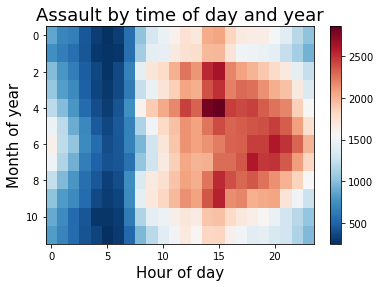

In [189]:
ct = allcrime_df[allcrime_df['Primary Type'] == 'ASSAULT'].groupby(['Month','Hour'])['ID'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='ID',index='Month',columns='Hour')),cmap='RdBu_r',label='Count',aspect='auto')
plt.xlabel('Hour of day',fontsize=15)
plt.ylabel('Month of year',fontsize=15)
plt.title('Assault by time of day and year',fontsize=18)
plt.colorbar()

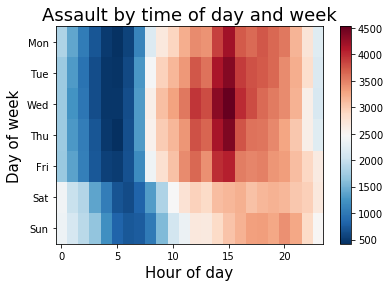

In [193]:
ct = allcrime_df[allcrime_df['Primary Type'] == 'ASSAULT'].groupby(['Weekday','Hour'])['ID'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='ID',index='Weekday',columns='Hour')),cmap='RdBu_r',label='Count',aspect='auto')
plt.xlabel('Hour of day',fontsize=15)
plt.ylabel('Day of week',fontsize=15)
plt.title('Assault by time of day and week',fontsize=18)
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.colorbar()

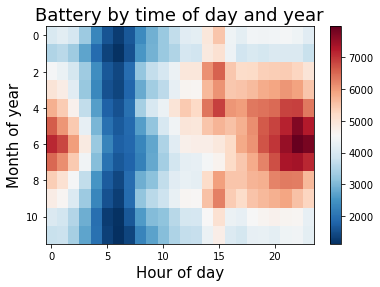

In [196]:
ct = allcrime_df[allcrime_df['Primary Type'] == 'BATTERY'].groupby(['Month','Hour'])['ID'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='ID',index='Month',columns='Hour')),cmap='RdBu_r',label='Count',aspect='auto')
plt.xlabel('Hour of day',fontsize=15)
plt.ylabel('Month of year',fontsize=15)
plt.title('Battery by time of day and year',fontsize=18)
plt.colorbar()

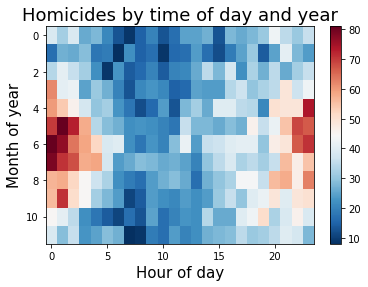

In [198]:
ct = allcrime_df[allcrime_df['Primary Type'] == 'HOMICIDE'].groupby(['Month','Hour'])['ID'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='ID',index='Month',columns='Hour')),cmap='RdBu_r',label='Count',aspect='auto')
plt.xlabel('Hour of day',fontsize=15)
plt.ylabel('Month of year',fontsize=15)
plt.title('Homicides by time of day and year',fontsize=18)
plt.colorbar()

# Temperature curve fitting:

(0, 365)

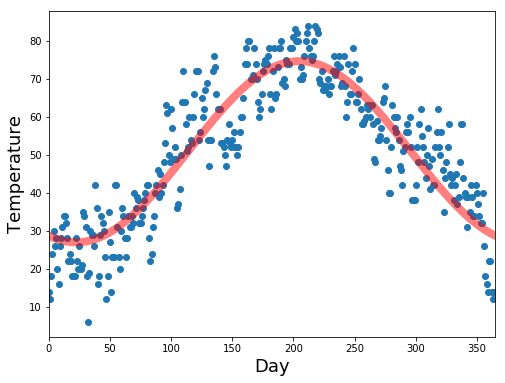

In [244]:
def sinfunc(x,a,b,c):
    return a*np.sin(2*np.pi/365.*x+b)+c

y2001 = np.array(ts['Temperature']['2001-1-1':'2001-12-31'])
x = np.arange(len(y2001))
fitpars,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y2001)

plt.figure(figsize=(8,6))
plt.scatter(x,y2001)
y = sinfunc(x,*fitpars)
plt.plot(x,y,'r-',lw=8,alpha=.5)
plt.ylabel('Temperature',fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.xlim((0,365))

In [319]:
for y in range(2001,2015):
    y_i = np.array(ts['Temperature']['{0}-1-1'.format(y):'{0}-12-31'.format(y)])
    y_i = np.nan_to_num(y_i)
    x = np.arange(len(y_i))
    try:
        fitpars_i,covmat =  curve_fit(f=sinfunc,xdata=x,ydata=y_i)
    except RuntimeError:
        print ("Couldn't find estimates for {0}".format(y))
        pass
    fitpars = np.vstack([fitpars,fitpars_i])
    
avg_params = fitpars.mean(axis=0)

# Statistical modeling for personal and property crimes:

In [362]:
lm_personal = smf.ols('Personal ~ Temperature + Time + C(Week) + C(Weekday)',data=ts.dropna()).fit()

lm_personal_x = pd.DataFrame({'Date':pd.date_range('2001-01-01','2021-12-31')})
lm_personal_x['Temperature'] = sinfunc(np.arange(len(lm_personal_x)),*avg_params)
lm_personal_x['Month'] = lm_personal_x['Date'].apply(lambda x:x.month)
lm_personal_x['Week'] = lm_personal_x['Date'].apply(lambda x:x.week)
lm_personal_x['Weekday'] = lm_personal_x['Date'].apply(lambda x:x.weekday())
lm_personal_x['Time'] = np.arange(len(lm_personal_x))
lm_personal_x = lm_personal_x.set_index('Date')

std,lower,upper = wls_prediction_std(lm_personal)

start_date = '2001-01-01'
personal_pred = pd.DataFrame(index = pd.date_range(start_date,'2021-12-31'))
personal_pred['Predictions'] = lm_personal.predict(lm_personal_x[start_date:])
personal_pred['Observations'] = ts['Personal'].loc[start_date:]

Text(0.5,1,'Comparison of model predictions and observed data')

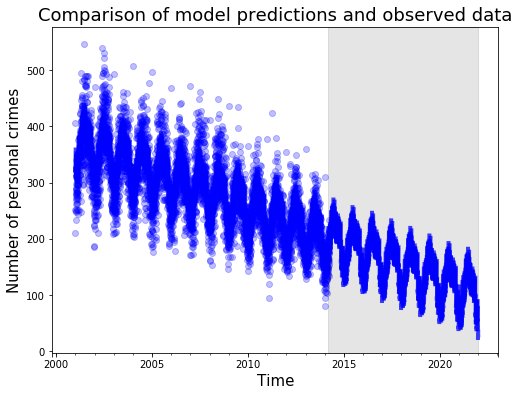

In [364]:
personal_pred['Predictions'].resample('W').plot(c='b',lw=4,alpha=.75,label='Predictions',figsize=(8,6))
#plt.plot(assault_pred.index,assault_pred['Lower_CI'])
#plt.figure(figsize=(8,6))
plt.scatter(personal_pred.index,personal_pred['Observations'],c='b',alpha=.25,label='Observations')
plt.ylabel('Number of personal crimes',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.axvspan(xmin='2014-3-1',xmax=personal_pred.index.max(),color='k',alpha=.1)
#plt.legend()
plt.title('Comparison of model predictions and observed data',fontsize=18)

In [365]:
lm_property = smf.ols('Property ~ Temperature + Time + C(Week) + C(Weekday)',data=ts.dropna()).fit()

lm_property_x = pd.DataFrame({'Date':pd.date_range('2001-01-01','2021-12-31')})
lm_property_x['Temperature'] = sinfunc(np.arange(len(lm_property_x)),*avg_params)
lm_property_x['Month'] = lm_property_x['Date'].apply(lambda x:x.month)
lm_property_x['Week'] = lm_property_x['Date'].apply(lambda x:x.week)
lm_property_x['Weekday'] = lm_property_x['Date'].apply(lambda x:x.weekday())
lm_property_x['Time'] = np.arange(len(lm_property_x))
lm_property_x = lm_property_x.set_index('Date')

std,lower,upper = wls_prediction_std(lm_property)

start_date = '2001-01-01'
property_pred = pd.DataFrame(index = pd.date_range(start_date,'2021-12-31'))
property_pred['Predictions'] = lm_property.predict(lm_property_x[start_date:])
property_pred['Observations'] = ts['Property'].loc[start_date:]

Text(0.5,1,'Comparison of model predictions and observed data')

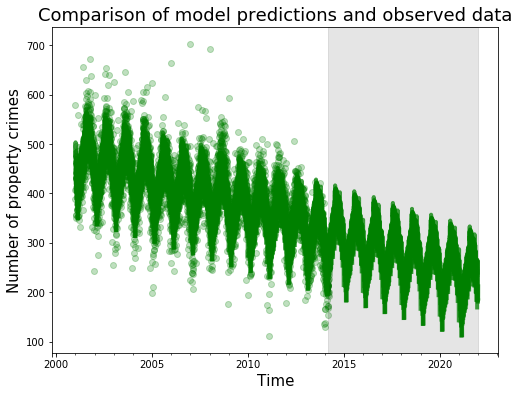

In [366]:
#property_pred[['Lower CI','Upper CI']].resample('W').plot(c='g',lw=1,alpha=.75)
property_pred['Predictions'].resample('W').plot(c='g',lw=4,alpha=.75,label='Predictions',figsize=(8,6))
#plt.plot(assault_pred.index,assault_pred['Lower_CI'])
plt.scatter(property_pred.index,property_pred['Observations'],c='g',alpha=.25,label='Observations')
plt.ylabel('Number of property crimes',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.axvspan(xmin='2014-3-1',xmax=property_pred.index.max(),color='k',alpha=.1)
#plt.legend()
plt.title('Comparison of model predictions and observed data',fontsize=18)

# Does assaults follows statistical model?

In [368]:
lm_assault = smf.ols('Assault ~ Temperature + Time + C(Week) + C(Weekday)',data=ts.dropna()).fit()

lm_assault_x = pd.DataFrame({'Date':pd.date_range('2001-01-01','2017-12-31')})
lm_assault_x['Temperature'] = sinfunc(np.arange(len(lm_assault_x)),*avg_params)
lm_assault_x['Month'] = lm_assault_x['Date'].apply(lambda x:x.month)
lm_assault_x['Week'] = lm_assault_x['Date'].apply(lambda x:x.week)
lm_assault_x['Weekday'] = lm_assault_x['Date'].apply(lambda x:x.weekday())
lm_assault_x['Time'] = np.arange(len(lm_assault_x))
lm_assault_x = lm_assault_x.set_index('Date')

std,lower,upper = wls_prediction_std(lm_assault)

start_date = '2013-01-01'
assault_pred = pd.DataFrame(index = pd.date_range(start_date,'2017-12-31'))
assault_pred['Predictions'] = lm_assault.predict(lm_assault_x[start_date:])
assault_pred['Observations'] = ts['Assault'].loc[start_date:]

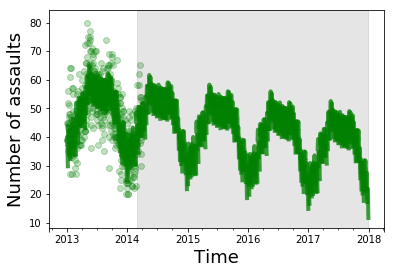

In [369]:
assault_pred['Predictions'].resample('W').plot(c='g',lw=4,alpha=.75)
plt.scatter(assault_pred.index,assault_pred['Observations'],c='g',alpha=.25,label='Observations')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.ylabel('Number of assaults',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.axvspan(xmin='2014-3-1',xmax=assault_pred.index.max(),color='k',alpha=.1)
#plt.legend()